In [1]:
import requests
import os
import datetime
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import hvplot.pandas
import plotly.express as px
from dotenv import load_dotenv
from panel.interact import interact
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,9)

In [2]:
# Import quarterly rent data
quarter_rent_path=Path("data/quarter_rent_df.csv")
quarter_rent_df=pd.read_csv(quarter_rent_path, index_col=0)
quarter_rent_df

FileNotFoundError: [Errno 2] File b'data\\quarter_rent_df.csv' does not exist: b'data\\quarter_rent_df.csv'

In [72]:
# Import quarterly sales data
quarter_sale_path=Path("data/quarter_sale_df.csv")
quarter_sale_df=pd.read_csv(quarter_sale_path, index_col=0)
quarter_sale_df

,Brooklyn,Manhattan,Queens,Staten Island
2015-Q1,467733.333333,8.827333e+05,326100.000000,369419.047619
2015-Q2,459933.333333,8.812333e+05,346380.000000,367414.285714
2015-Q3,481922.222222,8.468667e+05,338013.333333,387859.523810
2015-Q4,499700.000000,8.784667e+05,339253.333333,385983.333333
2016-Q1,525155.555556,1.024883e+06,341300.000000,379761.111111
2016-Q2,557544.444444,1.280733e+06,358483.333333,382344.444444
2016-Q3,515822.222222,1.081548e+06,364461.111111,399159.259259
2016-Q4,542422.222222,1.035373e+06,371122.222222,413107.407407
2017-Q1,525855.555556,9.964078e+05,391183.333333,421578.518519
2017-Q2,577166.666667,1.052972e+06,381011.111111,428583.333333


In [108]:
# Calculate the correlation between rental prices across boroughs
quarter_rent_correlation=quarter_rent_df.corr()
quarter_rent_correlation

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Bronx,1.000000,0.366216,-0.548014,0.891626,0.837897
Brooklyn,0.366216,1.000000,0.392652,0.581873,0.671171
Manhattan,-0.548014,0.392652,1.000000,-0.348909,-0.254617
Queens,0.891626,0.581873,-0.348909,1.000000,0.947908
Staten Island,0.837897,0.671171,-0.254617,0.947908,1.000000


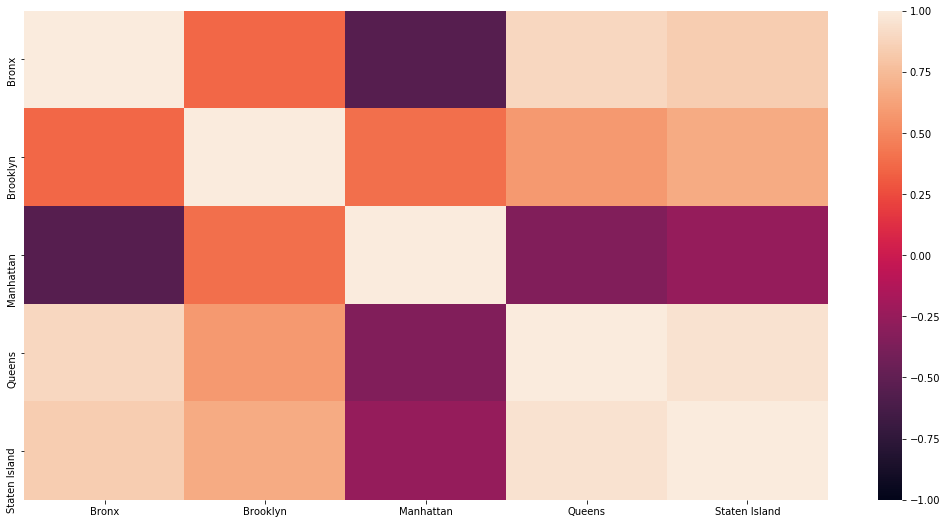

In [110]:
sns.heatmap(quarter_rent_correlation, vmin=-1, vmax=1)

In [73]:
# Calculate the correlation between sales prices across boroughs
quarter_sale_correlation=quarter_sale_df.corr()
quarter_sale_correlation

,Brooklyn,Manhattan,Queens,Staten Island
Brooklyn,1.000000,0.576517,0.836605,0.858589
Manhattan,0.576517,1.000000,0.250711,0.229528
Queens,0.836605,0.250711,1.000000,0.972870
Staten Island,0.858589,0.229528,0.972870,1.000000


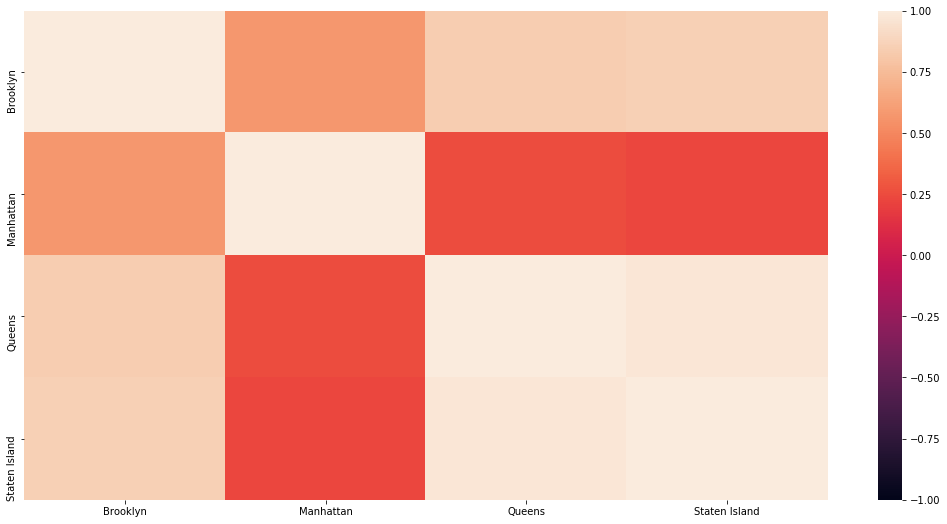

In [111]:
sns.heatmap(quarter_sale_correlation, vmin=-1, vmax=1)

In [75]:
# Create a new database for Brooklyn rent and sales prices 
index=('2015-Q1','2015-Q2','2015-Q3','2015-Q4','2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1','2018-Q2','2018-Q3','2018-Q4','2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1')
quarter_rent_sale_brooklyn=pd.DataFrame(index = index)
quarter_rent_sale_brooklyn['Brooklyn Rent']=quarter_rent_df['Brooklyn']
quarter_rent_sale_brooklyn['Brooklyn Sale']=quarter_sale_df['Brooklyn']
quarter_rent_sale_brooklyn

,Brooklyn Rent,Brooklyn Sale
2015-Q1,2183.284314,467733.333333
2015-Q2,2226.117647,459933.333333
2015-Q3,2316.440842,481922.222222
2015-Q4,2384.872549,499700.000000
2016-Q1,2388.568627,525155.555556
2016-Q2,2375.490196,557544.444444
2016-Q3,2389.627451,515822.222222
2016-Q4,2422.372549,542422.222222
2017-Q1,2394.774510,525855.555556
2017-Q2,2348.568925,577166.666667


In [76]:
# Determine if Brooklyn rent and sales prices are correlated 
correlation_rent_sale_brooklyn = quarter_rent_sale_brooklyn.corr()
correlation_rent_sale_brooklyn

,Brooklyn Rent,Brooklyn Sale
Brooklyn Rent,1.00000,0.23825
Brooklyn Sale,0.23825,1.00000


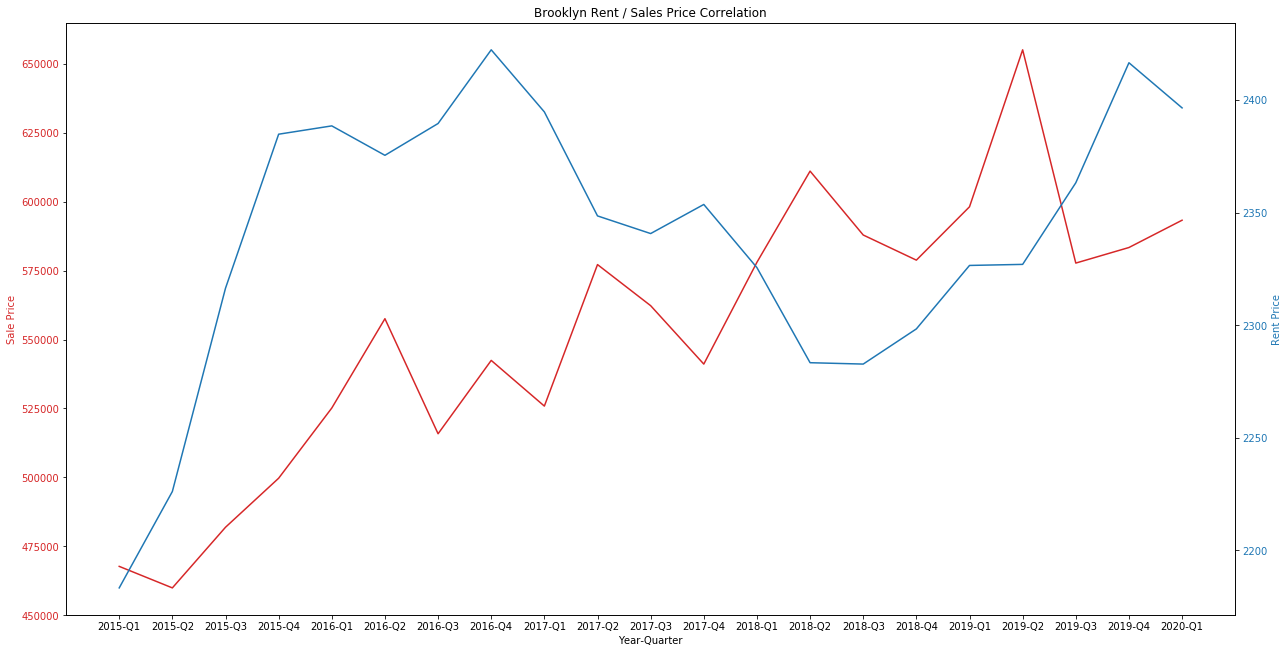

In [88]:
# Map Brooklyn rent and sales price correlation 
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Sale Price', color=color)
ax1.plot(quarter_rent_sale_brooklyn.index, quarter_rent_sale_brooklyn['Brooklyn Sale'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rent Price', color=color)  # we already handled the x-label with ax1
ax2.plot(quarter_rent_sale_brooklyn.index, quarter_rent_sale_brooklyn['Brooklyn Rent'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Brooklyn Rent / Sales Price Correlation')
plt.show()

In [78]:
# Create a new database for Manhattan rent and sales prices
index=('2015-Q1','2015-Q2','2015-Q3','2015-Q4','2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1','2018-Q2','2018-Q3','2018-Q4','2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1')
quarter_rent_sale_manhattan=pd.DataFrame(index = index)
quarter_rent_sale_manhattan['Manhattan Rent']=quarter_rent_df['Manhattan']
quarter_rent_sale_manhattan['Manhattan Sale']=quarter_sale_df['Manhattan']
quarter_rent_sale_manhattan

,Manhattan Rent,Manhattan Sale
2015-Q1,3565.471510,8.827333e+05
2015-Q2,3546.814282,8.812333e+05
2015-Q3,3393.259019,8.468667e+05
2015-Q4,3786.904551,8.784667e+05
2016-Q1,3892.253333,1.024883e+06
2016-Q2,3766.184930,1.280733e+06
2016-Q3,3794.189683,1.081548e+06
2016-Q4,3817.956349,1.035373e+06
2017-Q1,3584.146825,9.964078e+05
2017-Q2,3653.159431,1.052972e+06


In [79]:
# Determine if Manhattan rent and sales prices are correlated 
correlation_rent_sale_manhattan = quarter_rent_sale_manhattan.corr()
correlation_rent_sale_manhattan

,Manhattan Rent,Manhattan Sale
Manhattan Rent,1.000000,0.141805
Manhattan Sale,0.141805,1.000000


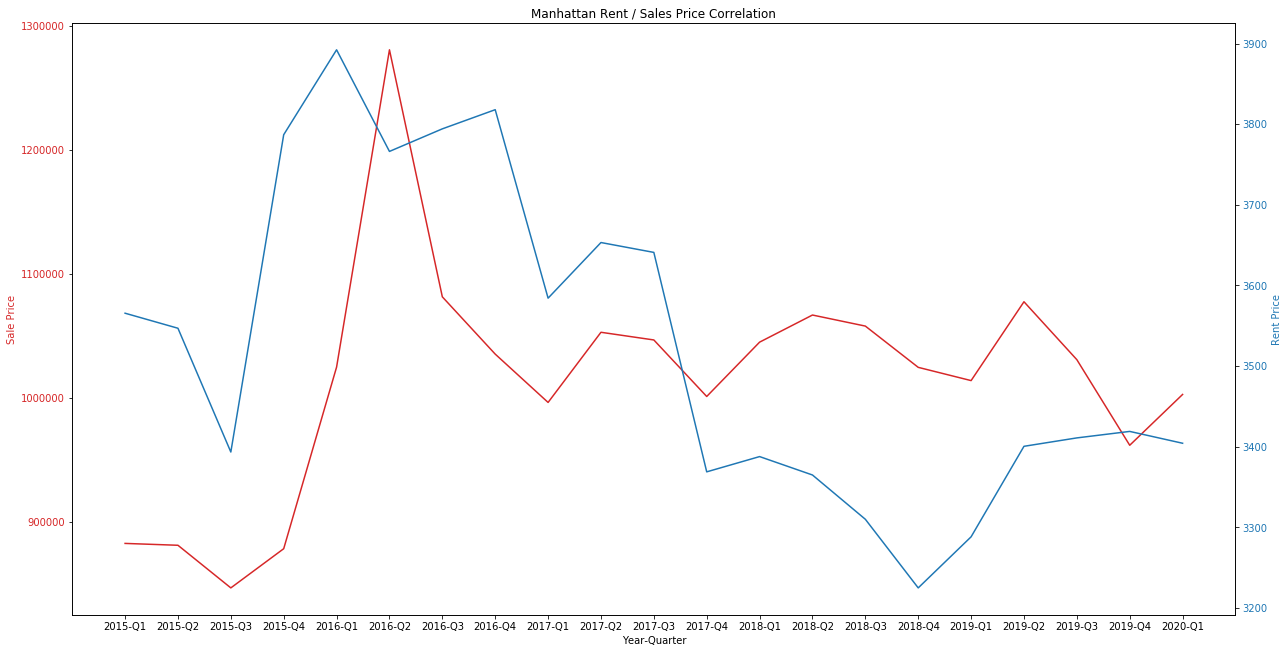

In [89]:
# Map Brooklyn rent and sales price correlation
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Sale Price', color=color)
ax1.plot(quarter_rent_sale_manhattan.index, quarter_rent_sale_manhattan['Manhattan Sale'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rent Price', color=color)  # we already handled the x-label with ax1
ax2.plot(quarter_rent_sale_manhattan.index, quarter_rent_sale_manhattan['Manhattan Rent'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Manhattan Rent / Sales Price Correlation')
plt.show()

In [81]:
# Create a new database for Queens rent and sales prices
index=('2015-Q1','2015-Q2','2015-Q3','2015-Q4','2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1','2018-Q2','2018-Q3','2018-Q4','2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1')
quarter_rent_sale_queens=pd.DataFrame(index = index)
quarter_rent_sale_queens['Queens Rent']=quarter_rent_df['Queens']
quarter_rent_sale_queens['Queens Sale']=quarter_sale_df['Queens']
quarter_rent_sale_queens

,Queens Rent,Queens Sale
2015-Q1,1890.415205,326100.000000
2015-Q2,1934.654971,346380.000000
2015-Q3,2000.231099,338013.333333
2015-Q4,2049.690058,339253.333333
2016-Q1,2065.175439,341300.000000
2016-Q2,2076.321637,358483.333333
2016-Q3,2092.292398,364461.111111
2016-Q4,2117.192982,371122.222222
2017-Q1,2123.643275,391183.333333
2017-Q2,2108.695906,381011.111111


In [82]:
# Determine if Queens rent and sales prices are correlated 
correlation_rent_sale_queens = quarter_rent_sale_queens.corr()
correlation_rent_sale_queens

,Queens Rent,Queens Sale
Queens Rent,1.000000,0.814835
Queens Sale,0.814835,1.000000


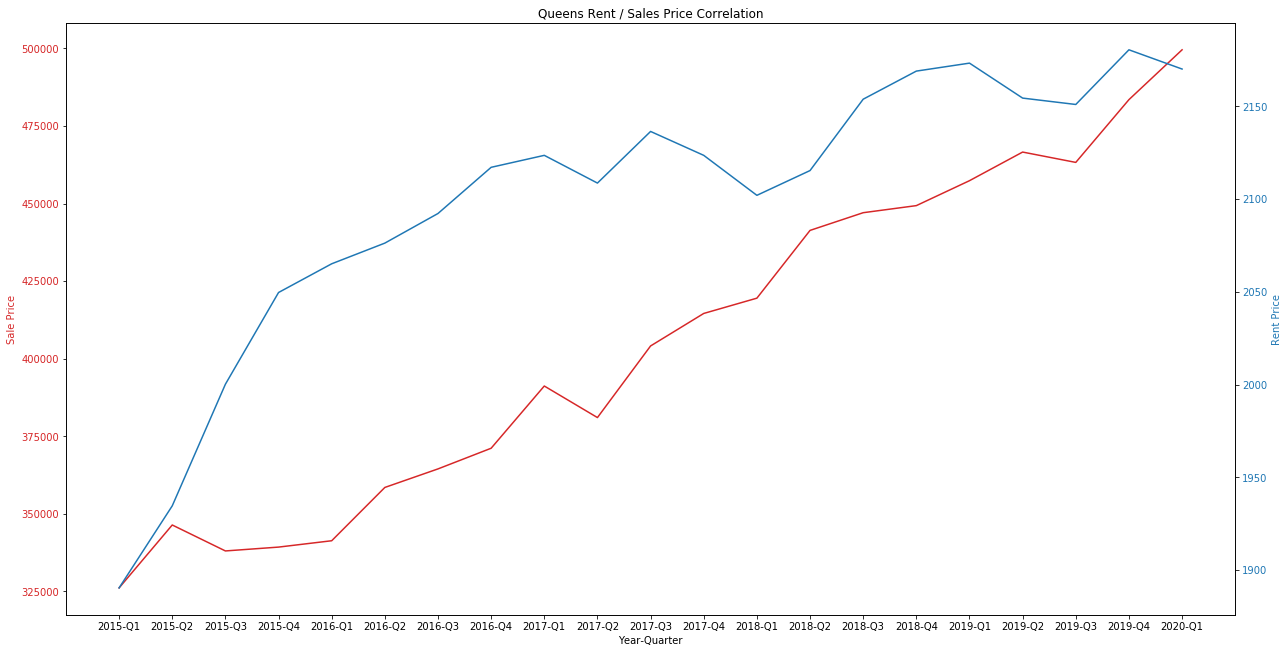

In [103]:
# Map Queens rent and sales price correlation
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Sale Price', color=color)
ax1.plot(quarter_rent_sale_queens.index, quarter_rent_sale_queens['Queens Sale'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
 
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rent Price', color=color)  # we already handled the x-label with ax1
ax2.plot(quarter_rent_sale_queens.index, quarter_rent_sale_queens['Queens Rent'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Queens Rent / Sales Price Correlation')
plt.show()

In [102]:
index=('2015-Q1','2015-Q2','2015-Q3','2015-Q4','2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1','2018-Q2','2018-Q3','2018-Q4','2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1')
quarter_rent_sale_statenisland=pd.DataFrame(index = index)
quarter_rent_sale_statenisland['Staten Island Rent']=quarter_rent_df['Staten Island']
quarter_rent_sale_statenisland['Staten Island Sale']=quarter_sale_df['Staten Island']
quarter_rent_sale_statenisland

,Staten Island Rent,Staten Island Sale
2015-Q1,1537.305556,369419.047619
2015-Q2,1606.222222,367414.285714
2015-Q3,1709.625000,387859.523810
2015-Q4,1878.777778,385983.333333
2016-Q1,1879.700000,379761.111111
2016-Q2,1852.885185,382344.444444
2016-Q3,1907.328571,399159.259259
2016-Q4,1962.731481,413107.407407
2017-Q1,1904.018687,421578.518519
2017-Q2,1859.305556,428583.333333


In [84]:
correlation_rent_sale_statenisland = quarter_rent_sale_statenisland.corr()
correlation_rent_sale_statenisland

,Staten Island Rent,Staten Island Sale
Staten Island Rent,1.000000,0.800369
Staten Island Sale,0.800369,1.000000


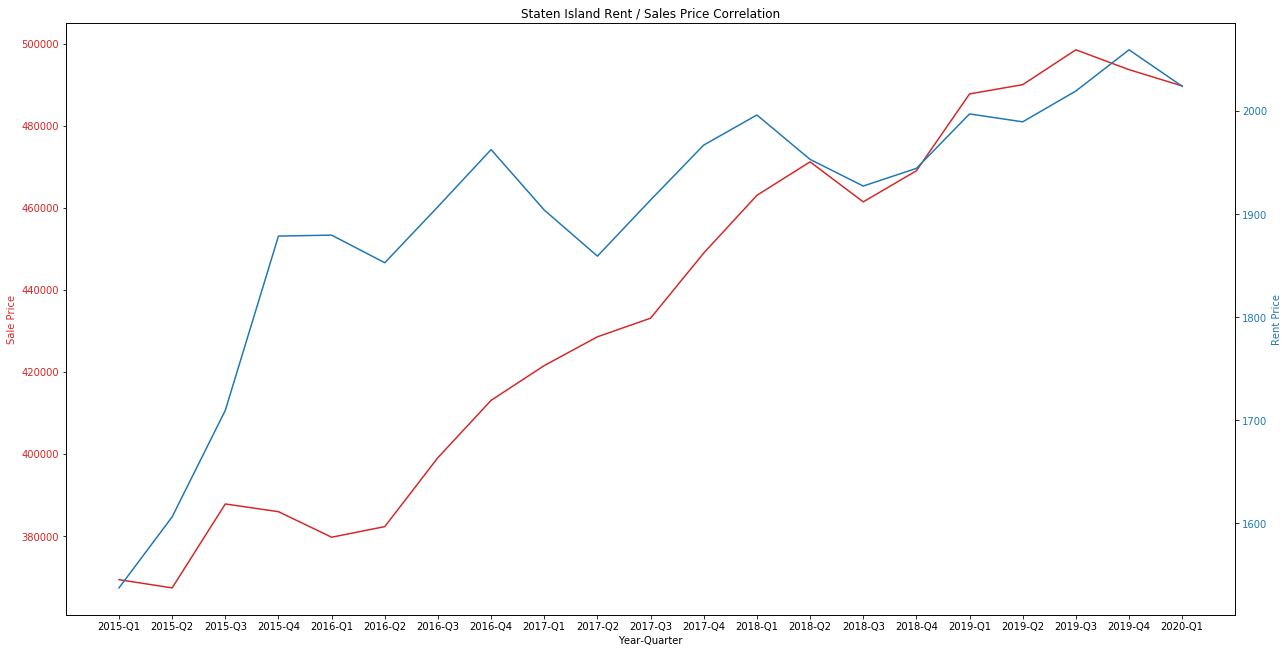

In [104]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Sale Price', color=color)
ax1.plot(quarter_rent_sale_statenisland.index, quarter_rent_sale_statenisland['Staten Island Sale'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rent Price', color=color)  # we already handled the x-label with ax1
ax2.plot(quarter_rent_sale_statenisland.index, quarter_rent_sale_statenisland['Staten Island Rent'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Staten Island Rent / Sales Price Correlation')
plt.show()

In [105]:
# Read in data for S&P500 prices 2015 Q1 - 2020 Q1
sp500_price_path=Path("data/s&p500_data.csv")
sp500_price_df=pd.read_csv(sp500_price_path, index_col=0)

In [106]:
# Transform weekly S&P500 return data to quarterly data by averageing 13 prices 
quarterly = [] 
for i in range(0, len(sp500_price_df['Close']), 13):
    quarterly.append(np.mean(sp500_price_df['Close'].iloc[i:i+13]))

# Create a new S&P500 dataframe and assign the quarterly index
sp500_quarterly = pd.DataFrame(index = index)
sp500_quarterly['S&P500 Price'] = quarterly
sp500_quarterly

,S&P500 Price
2015-Q1,2078.763077
2015-Q2,2102.975385
2015-Q3,2006.066154
2015-Q4,2023.436923
2016-Q1,1996.253077
2016-Q2,2091.836923
2016-Q3,2161.632308
2016-Q4,2215.876154
2017-Q1,2346.196923
2017-Q2,2422.663846
